<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.636396,59.621251,71.311720,-0.000430,203.568937,203.569506,-0.000570
1,0.0,1.0,81.462764,57.347198,47.160506,0.001285,195.971752,195.971280,0.000472
2,0.0,2.0,69.413709,50.316991,38.608854,-0.001151,168.338403,168.340608,-0.002205
3,0.0,3.0,97.416442,36.548108,67.170318,0.004793,211.139660,211.135543,0.004118
4,0.0,4.0,48.907890,21.775968,80.421043,0.009854,161.114755,161.105256,0.009499
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.857714,46.988897,65.585601,-0.001846,143.430366,143.431926,-0.001560
119996,999.0,116.0,56.493301,89.309098,93.287684,0.001386,249.091468,249.090411,0.001057
119997,999.0,117.0,41.473854,78.144097,34.187442,0.000243,163.805637,163.805390,0.000246
119998,999.0,118.0,74.853999,48.275706,70.085657,-0.001620,203.213743,203.215486,-0.001744


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.636396,59.621251,71.311720,-0.000430,203.568937,203.569506,-0.000570
1,0.0,1.0,81.462764,57.347198,47.160506,0.001285,195.971752,195.971280,0.000472
2,0.0,2.0,69.413709,50.316991,38.608854,-0.001151,168.338403,168.340608,-0.002205
3,0.0,3.0,97.416442,36.548108,67.170318,0.004793,211.139660,211.135543,0.004118
4,0.0,4.0,48.907890,21.775968,80.421043,0.009854,161.114755,161.105256,0.009499
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.857714,46.988897,65.585601,-0.001846,143.430366,143.431926,-0.001560
119996,999.0,116.0,56.493301,89.309098,93.287684,0.001386,249.091468,249.090411,0.001057
119997,999.0,117.0,41.473854,78.144097,34.187442,0.000243,163.805637,163.805390,0.000246
119998,999.0,118.0,74.853999,48.275706,70.085657,-0.001620,203.213743,203.215486,-0.001744


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    62.636396  59.621251  71.311720 -0.000430  203.568937   
      1.0    81.462764  57.347198  47.160506  0.001285  195.971752   
      2.0    69.413709  50.316991  38.608854 -0.001151  168.338403   
      3.0    97.416442  36.548108  67.170318  0.004793  211.139660   
      4.0    48.907890  21.775968  80.421043  0.009854  161.114755   
...                ...        ...        ...       ...         ...   
999.0 115.0  20.857714  46.988897  65.585601 -0.001846  143.430366   
      116.0  56.493301  89.309098  93.287684  0.001386  249.091468   
      117.0  41.473854  78.144097  34.187442  0.000243  163.805637   
      118.0  74.853999  48.275706  70.085657 -0.001620  203.213743   
      119.0  51.299693  74.003794  82.152189  0.000775  217.456452   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.569506 -0.000570  
      1.0    195.971280  0.000472  
      2.0    168.340608 -0.002205  
      3.0    211.135543  0.004118  
      4.0    161.105256  0.009499  
...                 ...       ...  
999.0 115.0  143.431926 -0.001560  
      116.0  249.090411  0.001057  
      117.0  163.805390  0.000246  
      118.0  203.215486 -0.001744  
      119.0  217.455836  0.000616  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    62.636396  59.621251  71.311720 -0.000430  203.568937   
      1.0    81.462764  57.347198  47.160506  0.001285  195.971752   
      2.0    69.413709  50.316991  38.608854 -0.001151  168.338403   
      3.0    97.416442  36.548108  67.170318  0.004793  211.139660   
      4.0    48.907890  21.775968  80.421043  0.009854  161.114755   
...                ...        ...        ...       ...         ...   
999.0 115.0  20.857714  46.988897  65.585601 -0.001846  143.430366   
      116.0  56.493301  89.309098  93.287684  0.001386  249.091468   
      117.0  41.473854  78.144097  34.187442  0.000243  163.805637   
      118.0  74.853999  48.275706  70.085657 -0.001620  203.213743   
      119.0  51.299693  74.003794  82.152189  0.000775  217.456452   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.569506 -0.000570  
      1.0    195.971280  0.000472  
      2.0    168.340608 -0.002205  
      3.0    211.135543  0.004118  
      4.0    161.105256  0.009499  
...                 ...       ...  
999.0 115.0  143.431926 -0.001560  
      116.0  249.090411  0.001057  
      117.0  163.805390  0.000246  
      118.0  203.215486 -0.001744  
      119.0  217.455836  0.000616  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,62.636396,59.621251,71.311720,-0.000430,203.568937,203.569506,-0.000570
1,0.0,1.0,81.462764,57.347198,47.160506,0.001285,195.971752,195.971280,0.000472
2,0.0,2.0,69.413709,50.316991,38.608854,-0.001151,168.338403,168.340608,-0.002205
3,0.0,3.0,97.416442,36.548108,67.170318,0.004793,211.139660,211.135543,0.004118
4,0.0,4.0,48.907890,21.775968,80.421043,0.009854,161.114755,161.105256,0.009499
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,20.857714,46.988897,65.585601,-0.001846,143.430366,143.431926,-0.001560
119996,999.0,116.0,56.493301,89.309098,93.287684,0.001386,249.091468,249.090411,0.001057
119997,999.0,117.0,41.473854,78.144097,34.187442,0.000243,163.805637,163.805390,0.000246
119998,999.0,118.0,74.853999,48.275706,70.085657,-0.001620,203.213743,203.215486,-0.001744


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    62.636396  59.621251  71.311720 -0.000430  203.568937   
      1.0    81.462764  57.347198  47.160506  0.001285  195.971752   
      2.0    69.413709  50.316991  38.608854 -0.001151  168.338403   
      3.0    97.416442  36.548108  67.170318  0.004793  211.139660   
      4.0    48.907890  21.775968  80.421043  0.009854  161.114755   
...                ...        ...        ...       ...         ...   
999.0 115.0  20.857714  46.988897  65.585601 -0.001846  143.430366   
      116.0  56.493301  89.309098  93.287684  0.001386  249.091468   
      117.0  41.473854  78.144097  34.187442  0.000243  163.805637   
      118.0  74.853999  48.275706  70.085657 -0.001620  203.213743   
      119.0  51.299693  74.003794  82.152189  0.000775  217.456452   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    203.569506 -0.000570  
      1.0    195.971280  0.000472  
      2.0    168.340608 -0.002205  
      3.0    211.135543  0.004118  
      4.0    161.105256  0.009499  
...                 ...       ...  
999.0 115.0  143.431926 -0.001560  
      116.0  249.090411  0.001057  
      117.0  163.805390  0.000246  
      118.0  203.215486 -0.001744  
      119.0  217.455836  0.000616  

[120000 rows x 7 columns]

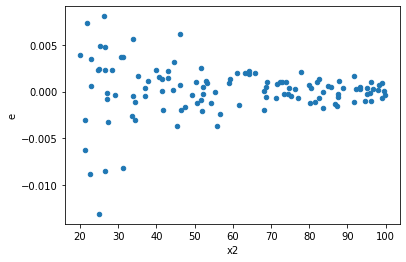

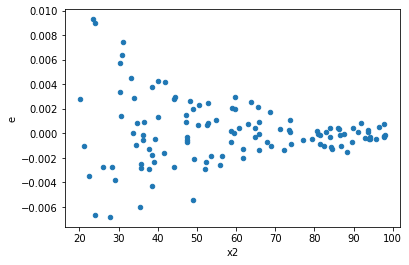

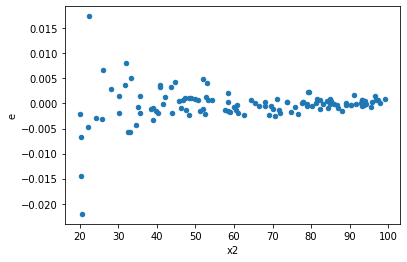

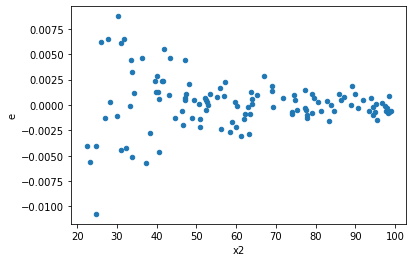

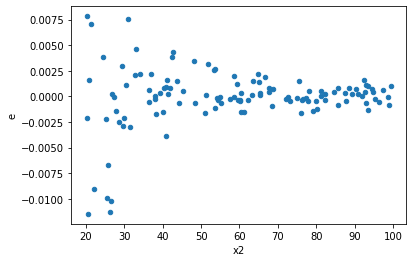

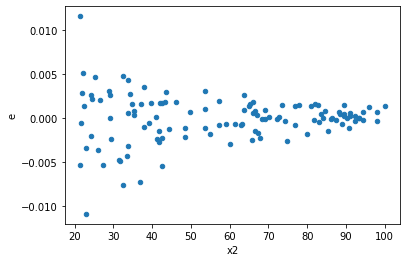

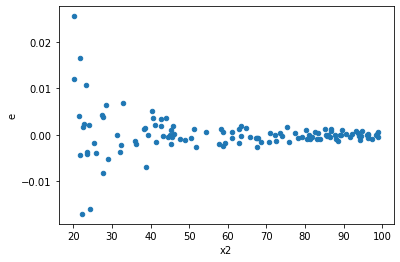

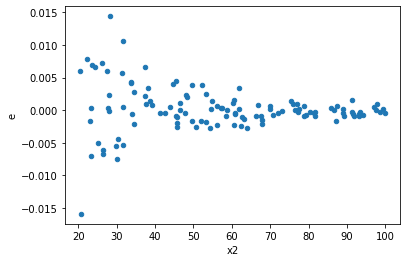

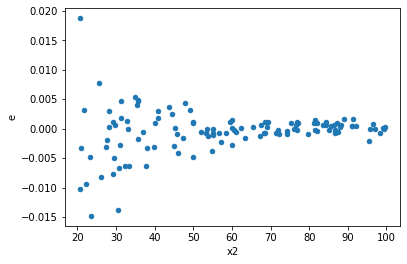

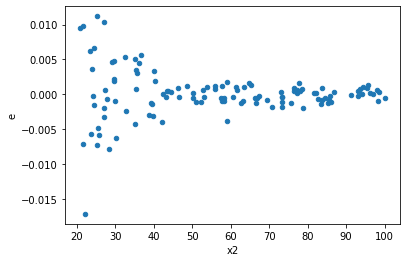

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
9.0,45.0,45.0,0.00036430553360260626,0.0005180398930960476,8.095678524502362e-06,1.1511997624356614e-05,1.4219929298717124,0.24147537823752097,0.8792623108812395,0.12073768911876048,Reject005=1 : Homoscedasticity
97.0,45.0,45.0,0.00025308740981073,0.0002887788627704565,5.624164662460667e-06,6.417308061565699e-06,1.1410242136754971,0.6600208021210443,0.6699895989394778,0.33001040106052215,Reject005=1 : Homoscedasticity
169.0,45.0,45.0,0.0002717386513165019,0.0003822570007819471,6.038636695922265e-06,8.494600017376601e-06,1.4067082431226217,0.25615481332502044,0.8719225933374898,0.12807740666251022,Reject005=1 : Homoscedasticity
461.0,45.0,45.0,0.00036192399895314167,0.00040961826226460917,8.042755532292037e-06,9.102628050324648e-06,1.1317797754484982,0.6797693231300026,0.6601153384349987,0.3398846615650013,Reject005=1 : Homoscedasticity
619.0,45.0,45.0,0.00011459291582074916,0.00012095898615394826,2.5465092404610923e-06,2.6879774700877392e-06,1.0555537860923023,0.8568967584301541,0.5715516207849229,0.42844837921507706,Reject005=1 : Homoscedasticity
872.0,45.0,45.0,0.00019435034163527986,0.0002658747164735502,4.318896480783997e-06,5.90832703274556e-06,1.3680177469021064,0.2968956642905187,0.8515521678547406,0.14844783214525936,Reject005=1 : Homoscedasticity
899.0,45.0,45.0,0.00019614809250147376,0.0002786246399420621,4.35884650003275e-06,6.191658665379158e-06,1.42048100692067,0.24289324340478102,0.8785533782976095,0.12144662170239051,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.0005087276172207175,9.229675039084779e-05,1.130505816046039e-05,2.0510388975743954e-06,0.18142665596785115,6.785489183923213e-08,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.0008784900269347103,0.0002130378637437651,1.9522000598549117e-05,4.734174749861447e-06,0.2425045899349728,5.40150927367908e-06,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,0.0005420644637876485,7.150097787324728e-05,1.2045876973058855e-05,1.588910619405495e-06,0.1319049350212662,3.2560032866732597e-10,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,0.0006706792790417905,0.0001596143190238691,1.4903983978706457e-05,3.546984867197091e-06,0.2379890418739527,4.132820294076354e-06,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.0006014335817304958,0.00021870003925947615,1.3365190705122128e-05,4.860000872432803e-06,0.3636312402613333,0.0009444480871556341,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,0.0008879516403997419,5.858337638086399e-05,1.9732258675549822e-05,1.3018528084636441e-06,0.06597586367934481,7.268409446496481e-16,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,0.0006487274613439296,0.000126862812239643,1.441616580764288e-05,2.8191736053254e-06,0.19555640819771827,2.2067781679369545e-07,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.0004768218482174073,8.156411076018357e-05,1.059604107149794e-05,1.812535794670746e-06,0.17105783022550247,2.6317190349312355e-08,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.0006009936784513384,7.782575033356716e-05,1.3355415076696408e-05,1.7294611185237149e-06,0.1294951230337585,2.356019273055776e-10,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    934
Reject005=1 : Homoscedasticity       66
Name: Result_test, dtype: int64